In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = r"D:\Projects\Hackathon\Agentic Hackathon\data\raw\ais_dummy\fishing_trajectories.csv"
df = pd.read_csv(file_path)

# Set display options
pd.set_option('display.max_columns', None)


In [7]:
# Dataset info
print("Dataset Info")
print(df.info())

# Shape
print(f"\nDataset shape: {df.shape}")


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026279 entries, 0 to 1026278
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1026279 non-null  object 
 1   t                1026279 non-null  object 
 2   longitude        1026279 non-null  float64
 3   latitude         1026279 non-null  float64
 4   x                1026279 non-null  float64
 5   y                1026279 non-null  float64
 6   signed_turn      1026279 non-null  float64
 7   bearing          1026279 non-null  float64
 8   time_gap         1026279 non-null  float64
 9   distance_gap     1026279 non-null  float64
 10  euc_speed        1026279 non-null  float64
 11  distanceToShore  1026279 non-null  float64
 12  label            1026279 non-null  object 
dtypes: float64(10), object(3)
memory usage: 101.8+ MB
None

Dataset shape: (1026279, 13)


In [9]:
# First few rows
print("Sample Rows")
print(df.head())

# Column names
print("\nColumn Names")
print(df.columns.tolist())


Sample Rows
            id                    t  longitude   latitude              x  \
0  211477000-2  2021-11-14 15:00:10  12.310170  56.127777  705723.070725   
1  211477000-2  2021-11-14 15:00:13  12.310137  56.127788  705720.961925   
2  211477000-2  2021-11-14 15:00:16  12.310103  56.127800  705718.785662   
3  211477000-2  2021-11-14 15:00:18  12.310067  56.127815  705716.469132   
4  211477000-2  2021-11-14 15:00:22  12.310025  56.127830  705713.779868   

              y  signed_turn     bearing  time_gap  distance_gap  euc_speed  \
0  6.225237e+06    -1.234666  309.501333       4.0      2.979797   1.448065   
1  6.225238e+06    -8.618680  300.882654       3.0      2.390153   1.548695   
2  6.225240e+06     1.461697  302.344350       3.0      2.501440   1.620804   
3  6.225241e+06     4.437298  306.781649       2.0      2.793416   2.714983   
4  6.225243e+06    -4.130020  302.651628       4.0      3.100555   1.506749   

   distanceToShore       label  
0         6.726540  01-

In [10]:
# Missing values
print("Missing Values")
print(df.isnull().sum())

# Data types
print("\nData Types")
print(df.dtypes)


Missing Values
id                 0
t                  0
longitude          0
latitude           0
x                  0
y                  0
signed_turn        0
bearing            0
time_gap           0
distance_gap       0
euc_speed          0
distanceToShore    0
label              0
dtype: int64

Data Types
id                  object
t                   object
longitude          float64
latitude           float64
x                  float64
y                  float64
signed_turn        float64
bearing            float64
time_gap           float64
distance_gap       float64
euc_speed          float64
distanceToShore    float64
label               object
dtype: object


In [11]:
# Statistical summary
print("Descriptive Statistics")
print(df.describe(include='all'))

# Unique values
print("\nUnique Values Count")
print(df.nunique())


Descriptive Statistics
                 id                    t     longitude      latitude  \
count       1026279              1026279  1.026279e+06  1.026279e+06   
unique          123               409664           NaN           NaN   
top     235008380-3  2021-11-15 18:02:10           NaN           NaN   
freq          45251                   16           NaN           NaN   
mean            NaN                  NaN  9.961698e+00  5.695010e+01   
std             NaN                  NaN  1.554143e+00  8.167881e-01   
min             NaN                  NaN  6.647597e+00  5.461853e+01   
25%             NaN                  NaN  8.565907e+00  5.620853e+01   
50%             NaN                  NaN  1.007610e+01  5.722526e+01   
75%             NaN                  NaN  1.147959e+01  5.765478e+01   
max             NaN                  NaN  1.234018e+01  5.804243e+01   

                   x             y   signed_turn       bearing      time_gap  \
count   1.026279e+06  1.026279e+

Label Distribution
label
02-fishing    74.481501
03-sailing    12.632530
01-sailing    11.750119
04-fishing     1.084793
05-sailing     0.051058
Name: proportion, dtype: float64


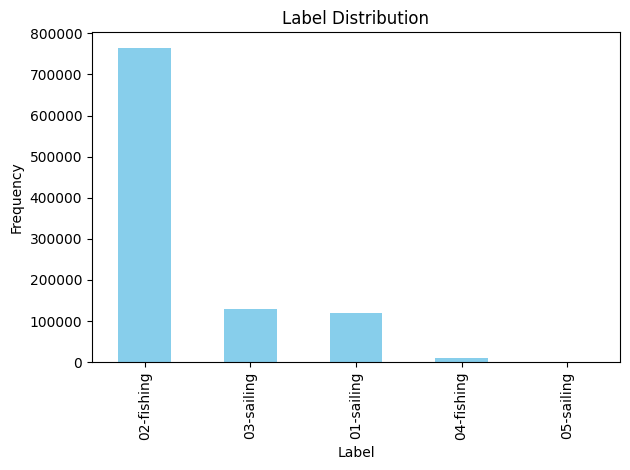

In [12]:
# Label distribution
print("Label Distribution")
print(df['label'].value_counts(normalize=True) * 100)

# Plot distribution
df['label'].value_counts().plot(kind='bar', title='Label Distribution', color='skyblue')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Correlation Matrix


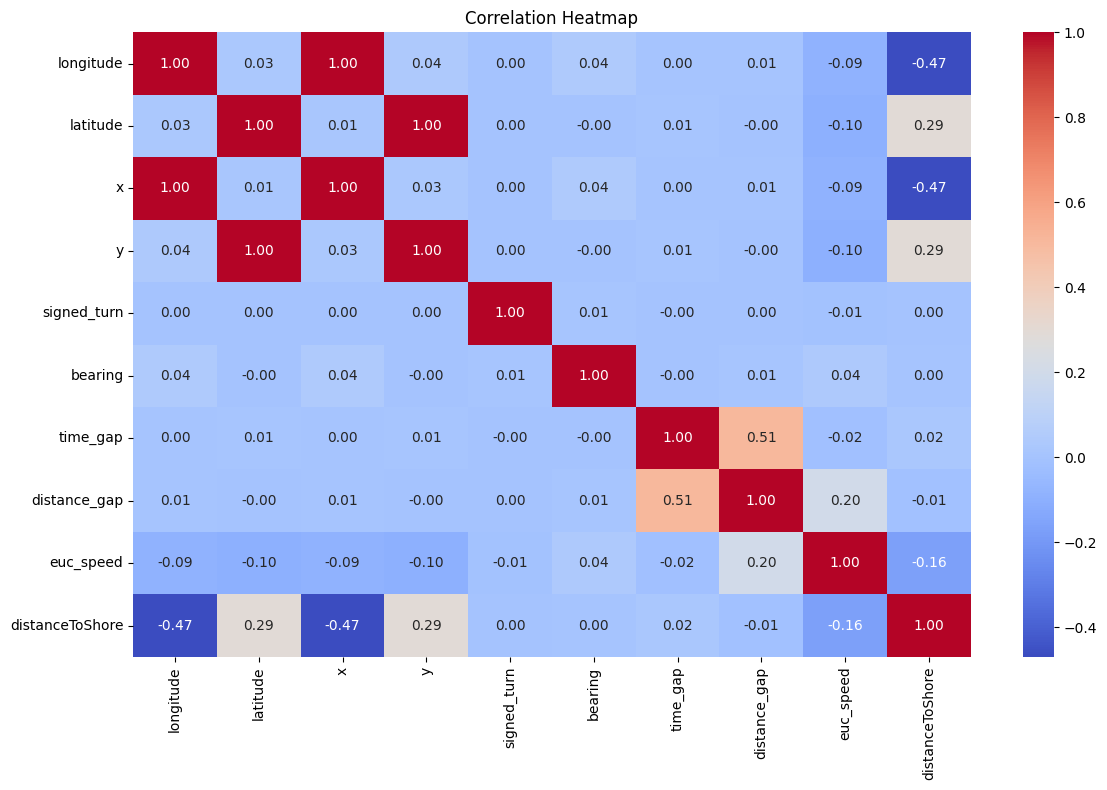

In [13]:
# Correlation matrix for numerical columns
print("Correlation Matrix")
corr = df.select_dtypes(include=[np.number]).corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


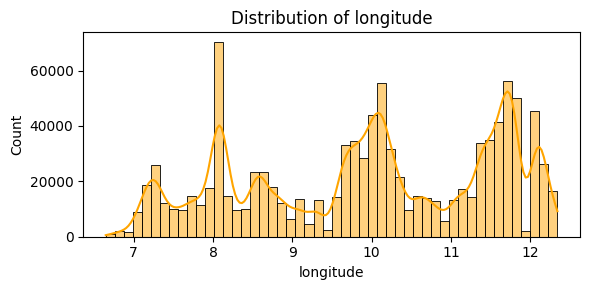

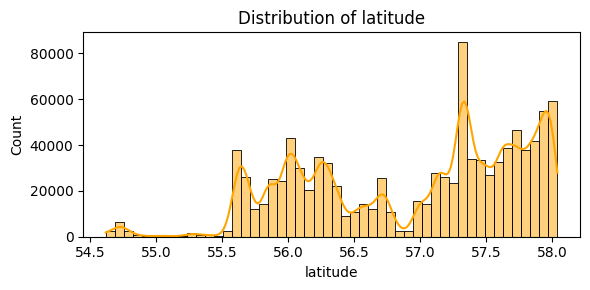

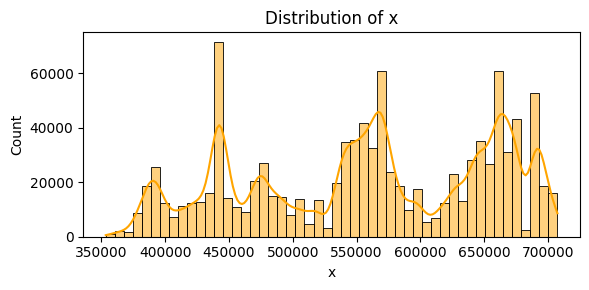

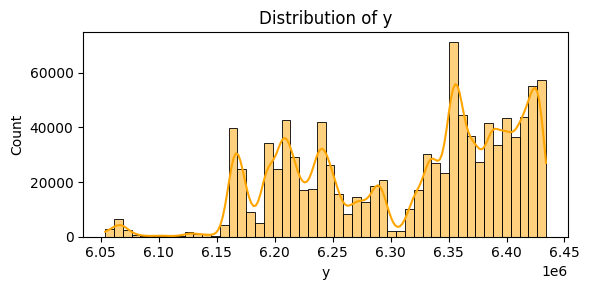

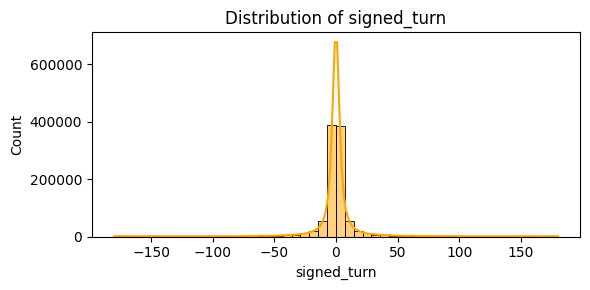

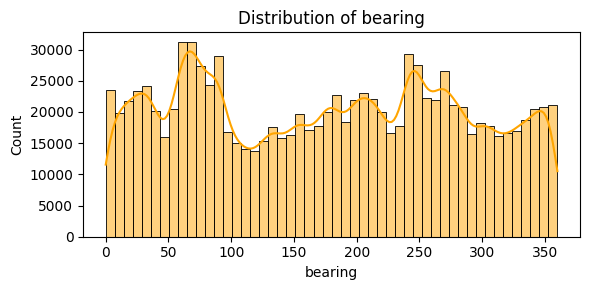

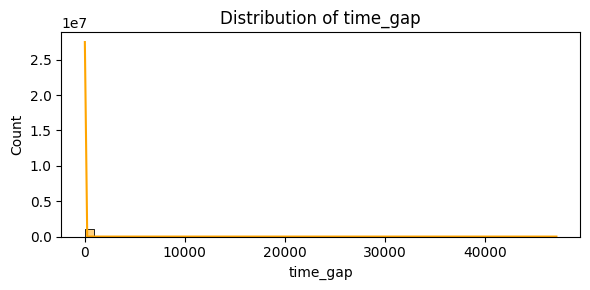

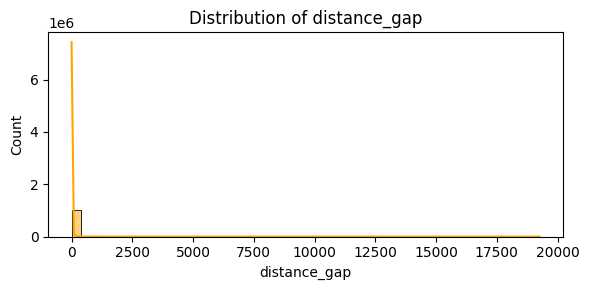

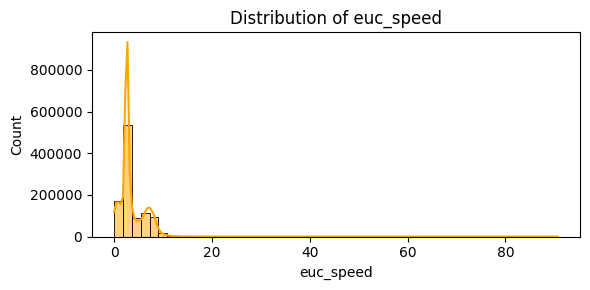

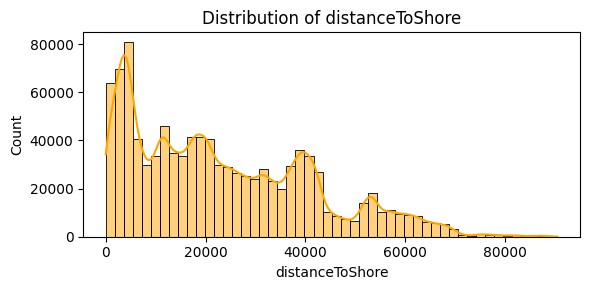

In [14]:
# Histograms for numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=50, color='orange')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


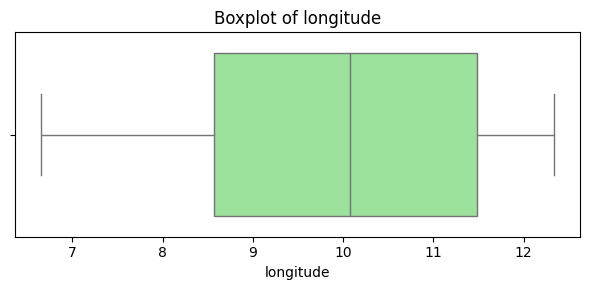

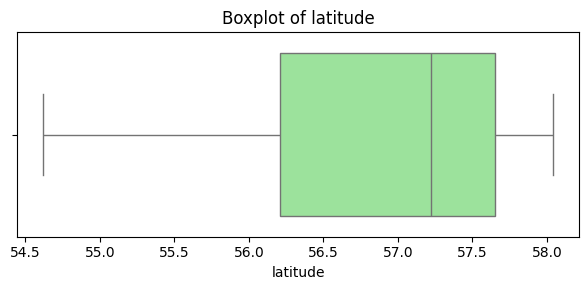

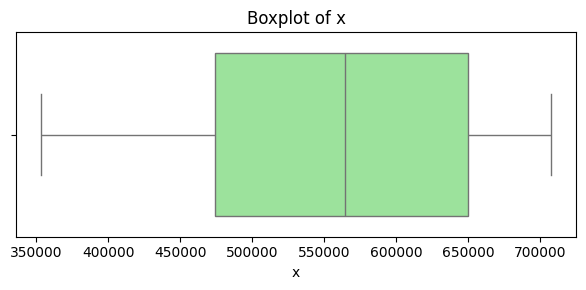

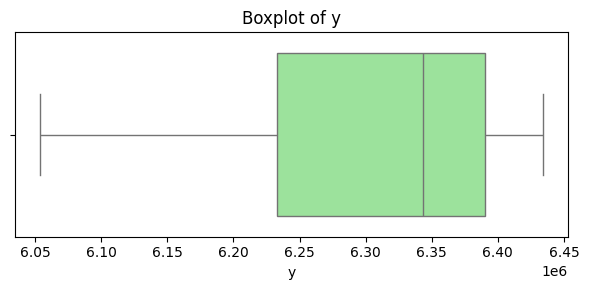

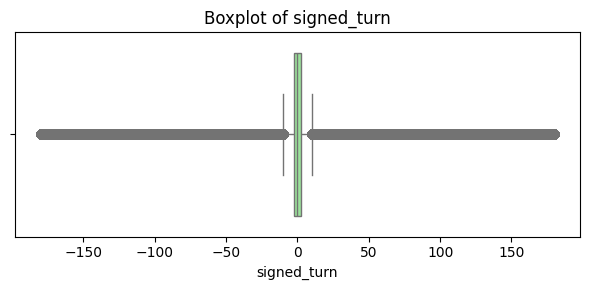

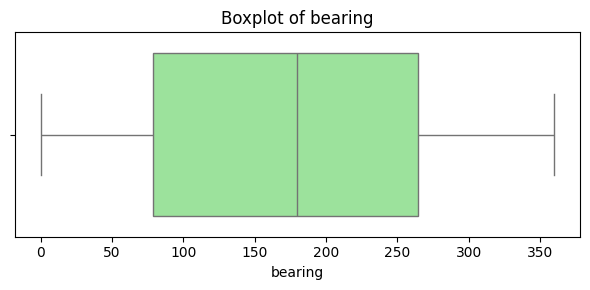

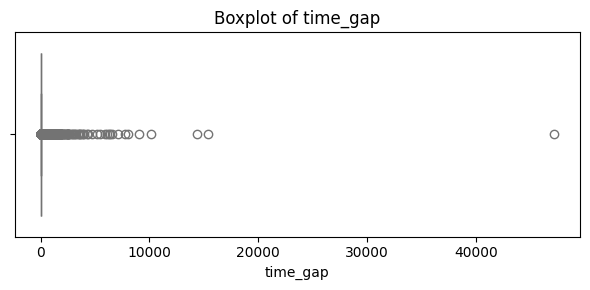

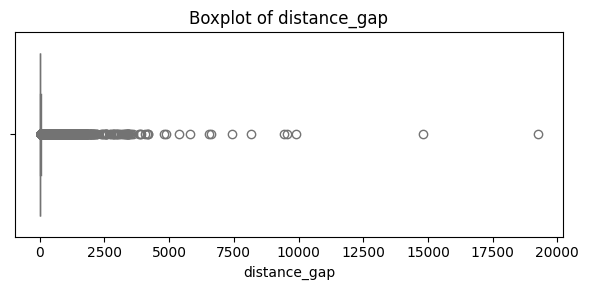

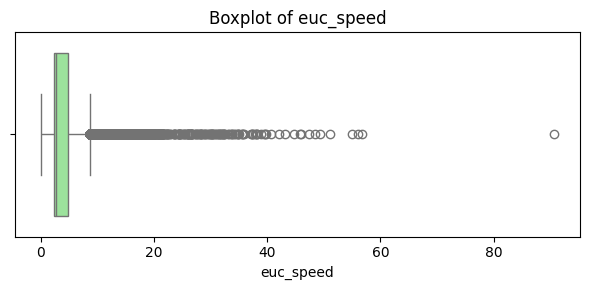

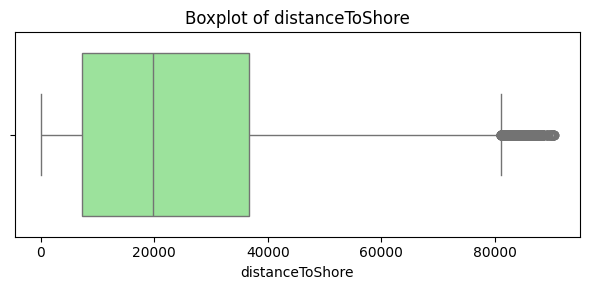

In [15]:
# Boxplots for outliers
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [16]:
# Convert 't' to datetime if it exists
if 't' in df.columns:
    try:
        df['t'] = pd.to_datetime(df['t'])
        print("\n✅ Converted 't' to datetime")
        print(df['t'].describe())
    except Exception as e:
        print(f"\n⚠️ Could not convert 't': {e}")



✅ Converted 't' to datetime
count                          1026279
mean     2021-11-16 11:37:46.361385728
min                2021-11-14 00:00:03
25%                2021-11-15 09:43:27
50%                2021-11-16 05:19:03
75%                2021-11-17 05:21:52
max                2021-11-20 23:59:53
Name: t, dtype: object


In [17]:
# Final null check
print("Final Missing Values")
print(df.isnull().sum())


Final Missing Values
id                 0
t                  0
longitude          0
latitude           0
x                  0
y                  0
signed_turn        0
bearing            0
time_gap           0
distance_gap       0
euc_speed          0
distanceToShore    0
label              0
dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop non-numeric or non-useful columns
df_model = df.drop(columns=["id", "t"])

# Encode the target
le = LabelEncoder()
df_model['label_encoded'] = le.fit_transform(df_model['label'])
class_names = le.classes_

# Drop original label column
df_model.drop(columns=["label"], inplace=True)

# Split features and target
X = df_model.drop(columns=["label_encoded"])
y = df_model["label_encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [22]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
since = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
elapsed_time = time.time() - since
print(f"The Training time is {elapsed_time//60:.0f}m {elapsed_time%60:.0f}s") 



The Training time is 5m 0s


In [23]:
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

  01-sailing       0.99      0.99      0.99     24118
  02-fishing       1.00      1.00      1.00    152878
  03-sailing       1.00      0.99      0.99     25929
  04-fishing       0.93      0.97      0.95      2226
  05-sailing       0.99      0.85      0.91       105

    accuracy                           1.00    205256
   macro avg       0.98      0.96      0.97    205256
weighted avg       1.00      1.00      1.00    205256



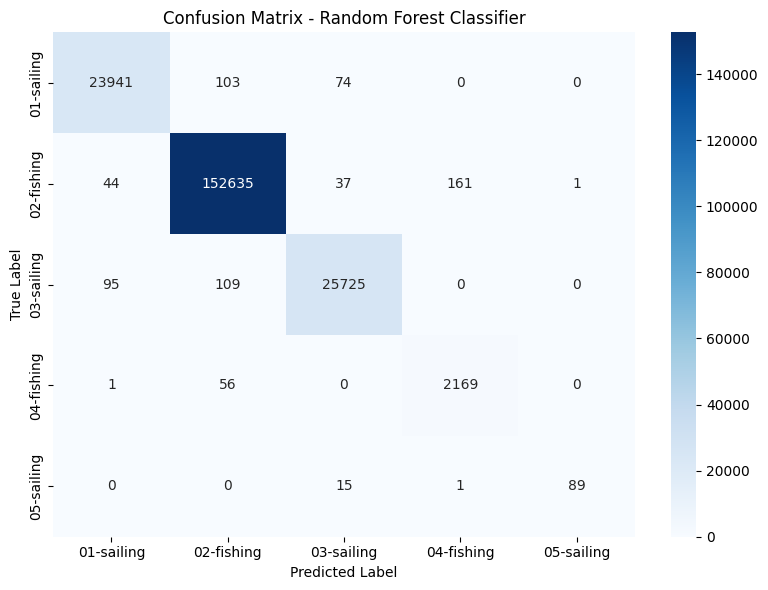

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.tight_layout()
plt.show()


### Optional Try XGBoost

In [25]:
from xgboost import XGBClassifier
since = time.time()
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
elapsed_time = time.time() - since
print(f"The Training time is {elapsed_time//60:.0f}m {elapsed_time%60:.0f}s") 

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb, target_names=class_names))


The Training time is 0m 4s
XGBoost Report:
               precision    recall  f1-score   support

  01-sailing       0.98      0.98      0.98     24118
  02-fishing       1.00      0.99      1.00    152878
  03-sailing       0.98      0.98      0.98     25929
  04-fishing       0.84      0.95      0.89      2226
  05-sailing       0.94      0.87      0.90       105

    accuracy                           0.99    205256
   macro avg       0.95      0.95      0.95    205256
weighted avg       0.99      0.99      0.99    205256



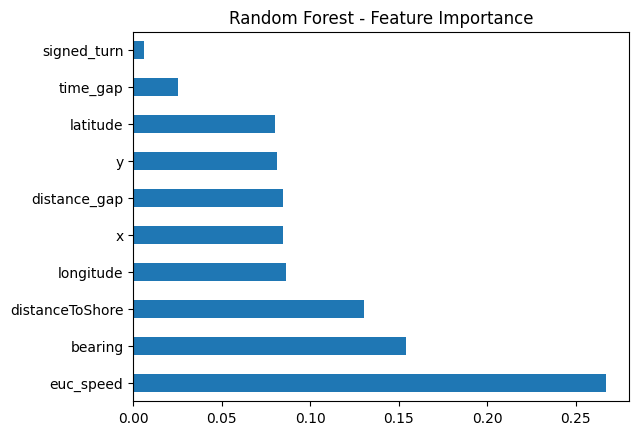

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest - Feature Importance")
plt.show()


In [28]:
import os
import joblib

# ✅ Update save path to correct folder
save_path = "../model_utils/fishing_trajectories"
os.makedirs(save_path, exist_ok=True)

# ✅ Save model, label encoder, and scaler
joblib.dump(rf_model, os.path.join(save_path, "rf_model.joblib"))
joblib.dump(le, os.path.join(save_path, "label_encoder.joblib"))
joblib.dump(xgb, os.path.join(save_path, "scaler.joblib"))

print("✅ Model, encoder, and scaler saved successfully to 'model_utils/fishing_trajectories/'")


✅ Model, encoder, and scaler saved successfully to 'model_utils/fishing_trajectories/'
